In [1]:
### import numpy as np 
import pandas as pd
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter
import sys
from datetime import datetime
from time import mktime, strptime
from matplotlib.colors import LogNorm, Normalize
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

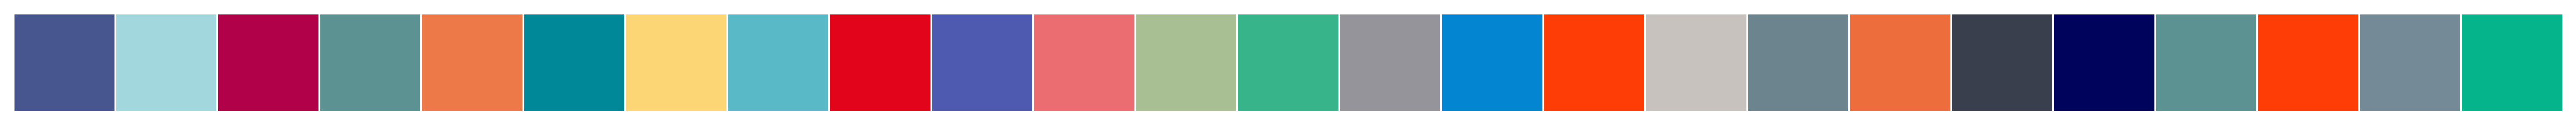

In [2]:
# define palette
many = ["#485690","#a2d7dd", "#b00149","#5c9291","#ee7948","#008899","#fcd575","#59b9c6", "#e2041b","#4d5aaf","#ec6d71","#a8bf93","#38b48b","#95949a","#0485d1","#fd3c06","#c8c2be","#6c848d","#ed6d3d","#393f4c","#00035b","#5c9291","#fd3c06","#748b97","#06b48b"]
sns.palplot(sns.color_palette(many))


In [3]:
#Import data
outprefix1 = "Complete_to_15Nov22_spike_charge"
dfComp_unique = pd.read_csv('Complete_to_15Nov22_spike_charge_sample_total_charge_date.csv', sep=",",index_col='Genome', na_values=['-'])
print(len(dfComp_unique.index))

8231177


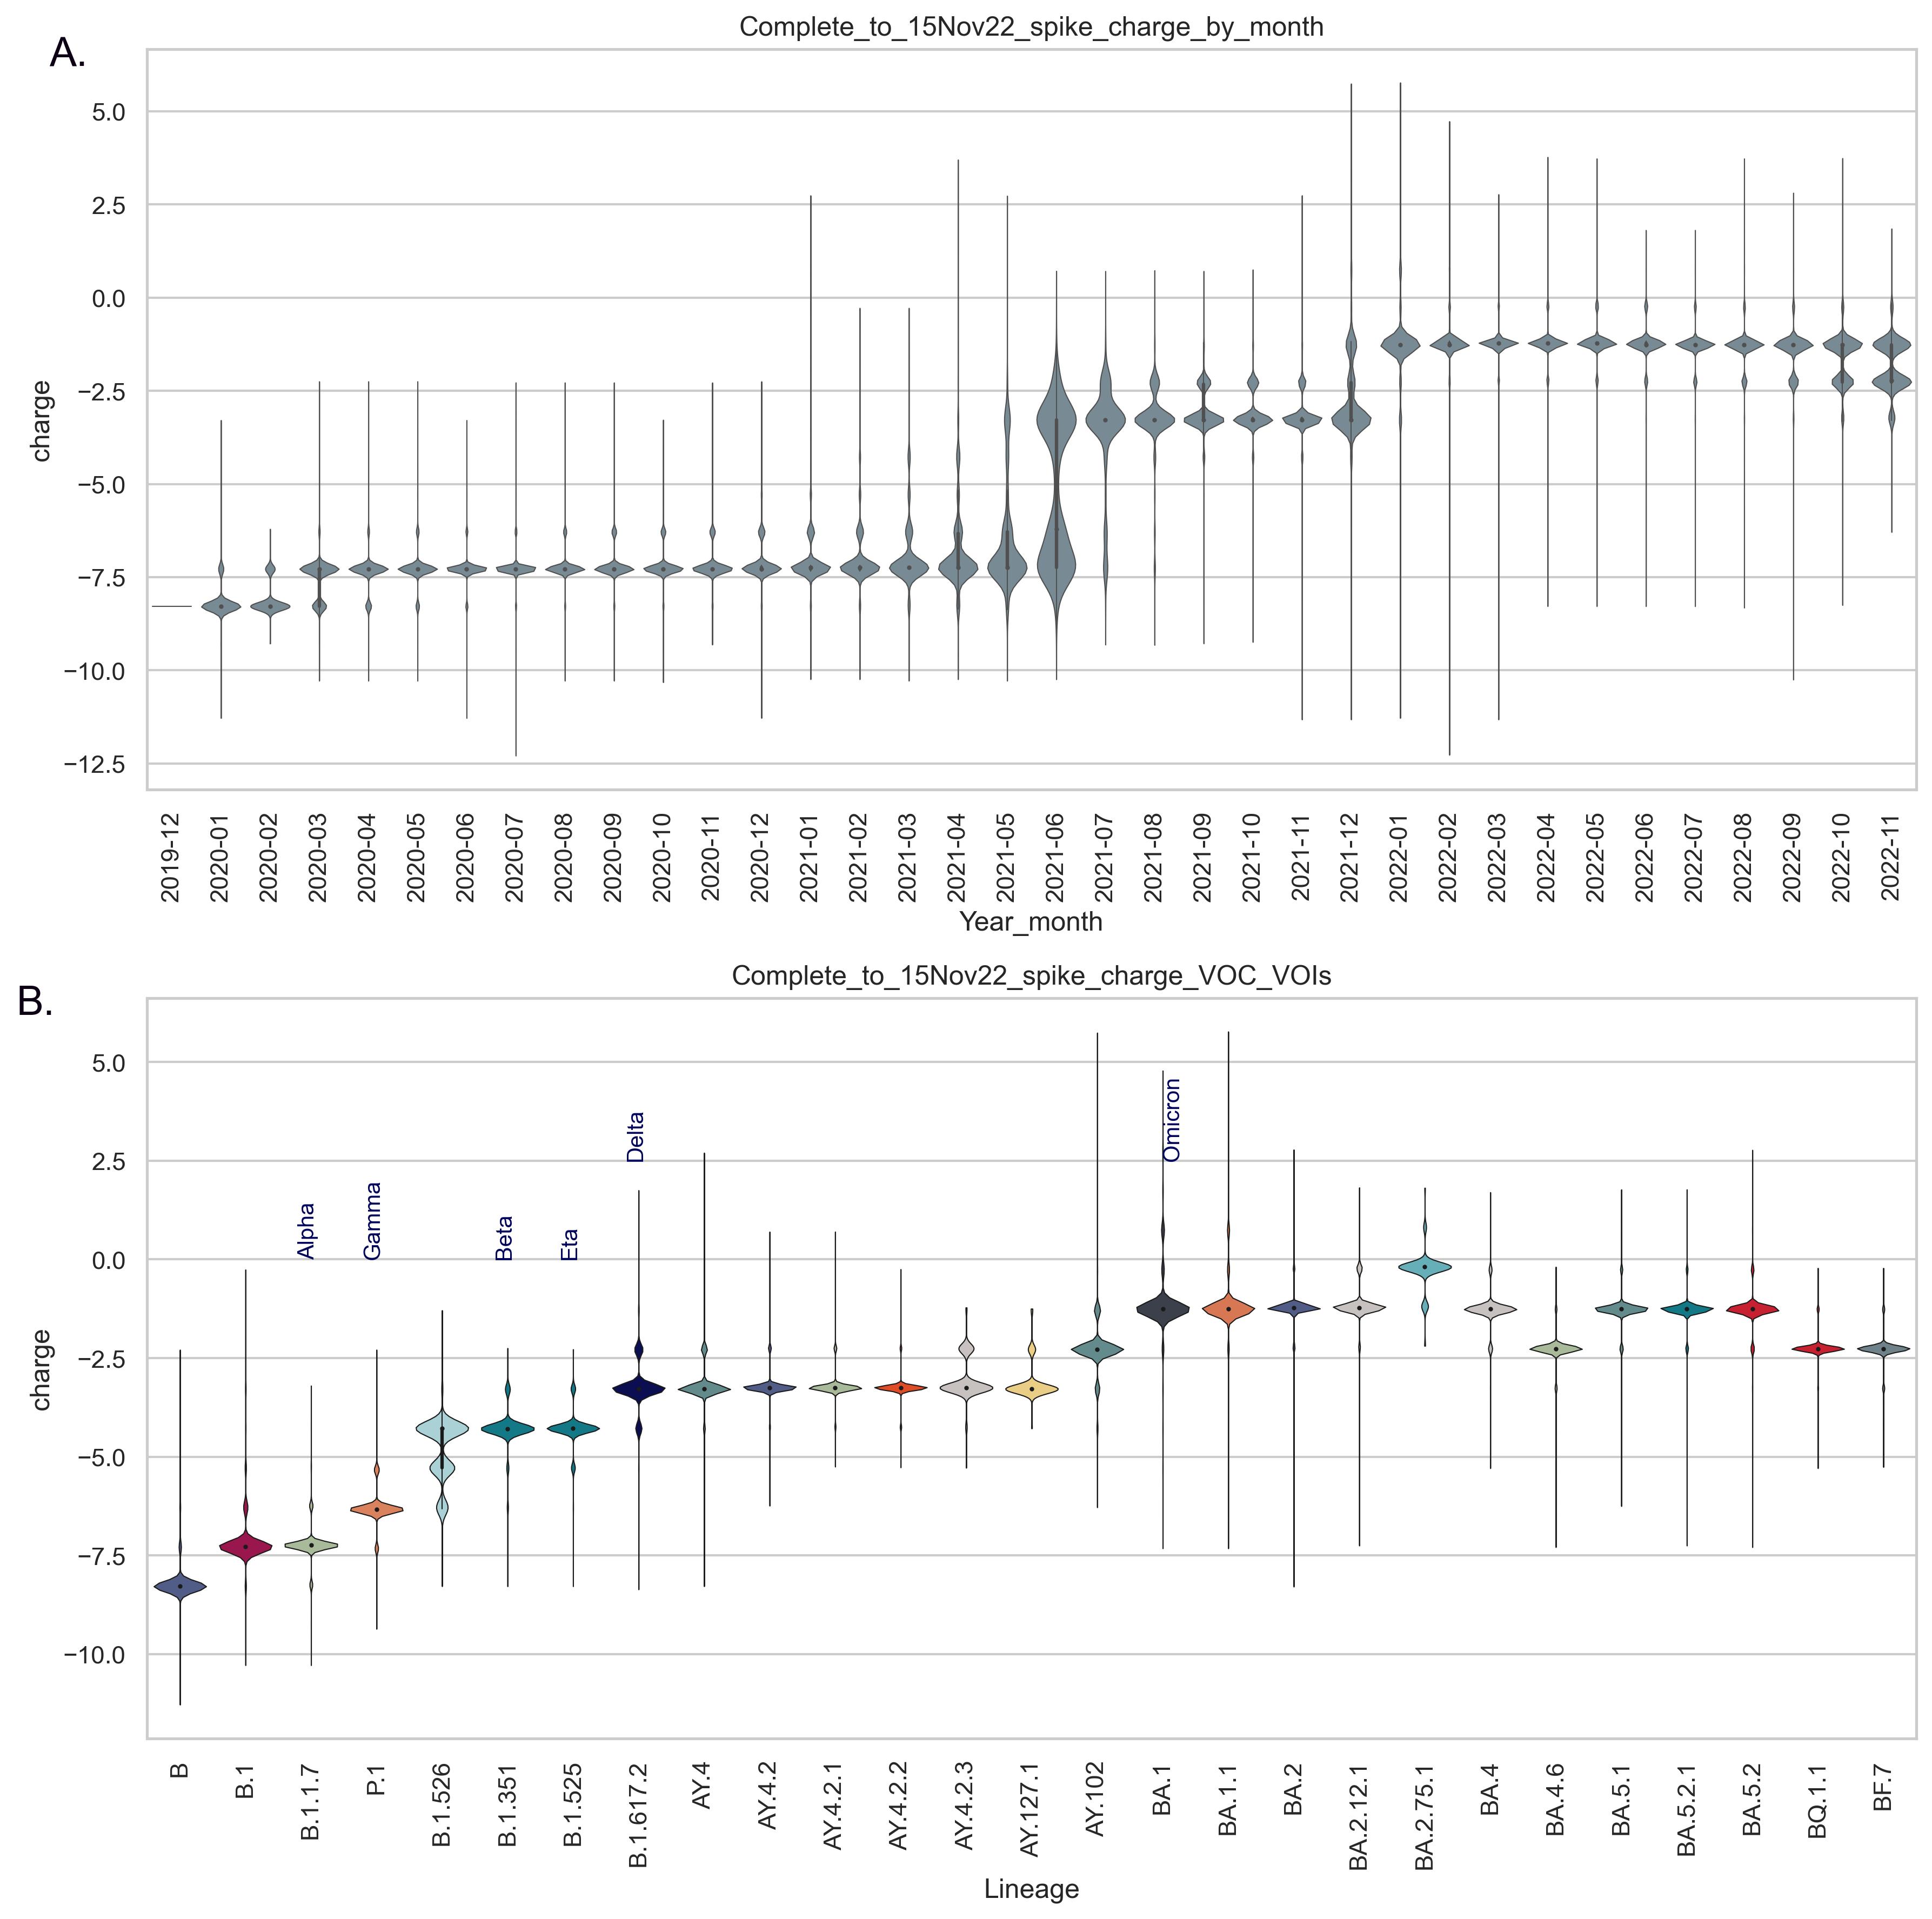

In [4]:
#Figure 2A 2b: by month, by lineage violin charts in one figure 
sns.set(style="whitegrid")

fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.4, wspace=0.8)
ax = fig.add_subplot(2, 1, 1)

#violin plot by month
sns.set(style="whitegrid")
this_order =['2019-12','2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11']
ax = sns.violinplot(data=dfComp_unique, x="Year_month", y="charge", color = "#748b97", dodge=False, linewidth = 0.5, cut=0, order = this_order, scale='width', bw=0.25)
ax.set_title(outprefix1+"_by_month")
plt.xticks(rotation=90)
ax.text(-2.5, 6, "A.", fontsize=18, va="bottom", color="#0d0015", rotation=0)

#violin plot by top lineages
ax = fig.add_subplot(2, 1, 2)
#10 fittest lineage plus early version (from Obermayer) plus recent most abundant Omicron lineages
this_order =['B','B.1','B.1.1.7','P.1','B.1.526','B.1.351','B.1.525','B.1.617.2','AY.4','AY.4.2','AY.4.2.1','AY.4.2.2','AY.4.2.3','AY.127.1','AY.102','BA.1','BA.1.1','BA.2','BA.2.12.1', 'BA.2.75.1','BA.4','BA.4.6','BA.5.1','BA.5.2.1','BA.5.2','BQ.1.1', 'BF.7']
ax = sns.violinplot(data=dfComp_unique, x="Lineage", y="charge", hue="Lineage", palette=many, dodge=False, linewidth = 0.5, order = this_order, cut=0, scale='width', bw=0.25)
ax.legend_.remove()
ax.set_title(outprefix1+"_VOC_VOIs")

ax.text(1.8, 0, "Alpha", fontsize=10, va="bottom", ha="left", color="#00035b", rotation=90)
ax.text(2.8, 0, "Gamma", fontsize=10, va="bottom", color="#00035b", rotation=90)
ax.text(4.8, 0, "Beta", fontsize=10, va="bottom", color="#00035b", rotation=90)
ax.text(5.8, 0, "Eta", fontsize=10, va="bottom", color="#00035b", rotation=90)
ax.text(6.8, 2.5, "Delta", fontsize=10, va="bottom", color="#00035b", rotation=90)
ax.text(15, 2.5, "Omicron", fontsize=10, va="bottom", color="#00035b", rotation=90)

plt.xticks(rotation=90)
ax.text(-2.5, 6, "B.", fontsize=18, va="bottom", color="#0d0015", rotation=0)

plt.tight_layout()
plt.savefig(outprefix1+'_Lineage_spike_charge_violin_plot_Month_Lineage.pdf',bbox_inches="tight") #bbox_inches="tight" important avoids cutoff
plt.savefig(outprefix1+'_Lineage_spike_charge_violin_plot_Month_Lineage.jpg',bbox_inches="tight", dpi = 300) #bbox_inches="tight" important avoids cutoff
